In [1]:

import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [3]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [4]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
# function to fetch the data into the created directory

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
# calling the above function

fetch_housing_data()

### Above code has downloaded the data, created the folders and extracted the data in the right folder

In [5]:
# function for loading the housing data

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
# getting the housing data stored in a variable by calling the function

housing  = load_housing_data()

In [7]:
# chekcing the head of the data loaded

housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
# Info method gives the basic information about the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# getting the count of the distinct categories of a particular column

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# describe() function is used for the summary of the numerical columns.

housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DCC395A58>,
      dtype=object)

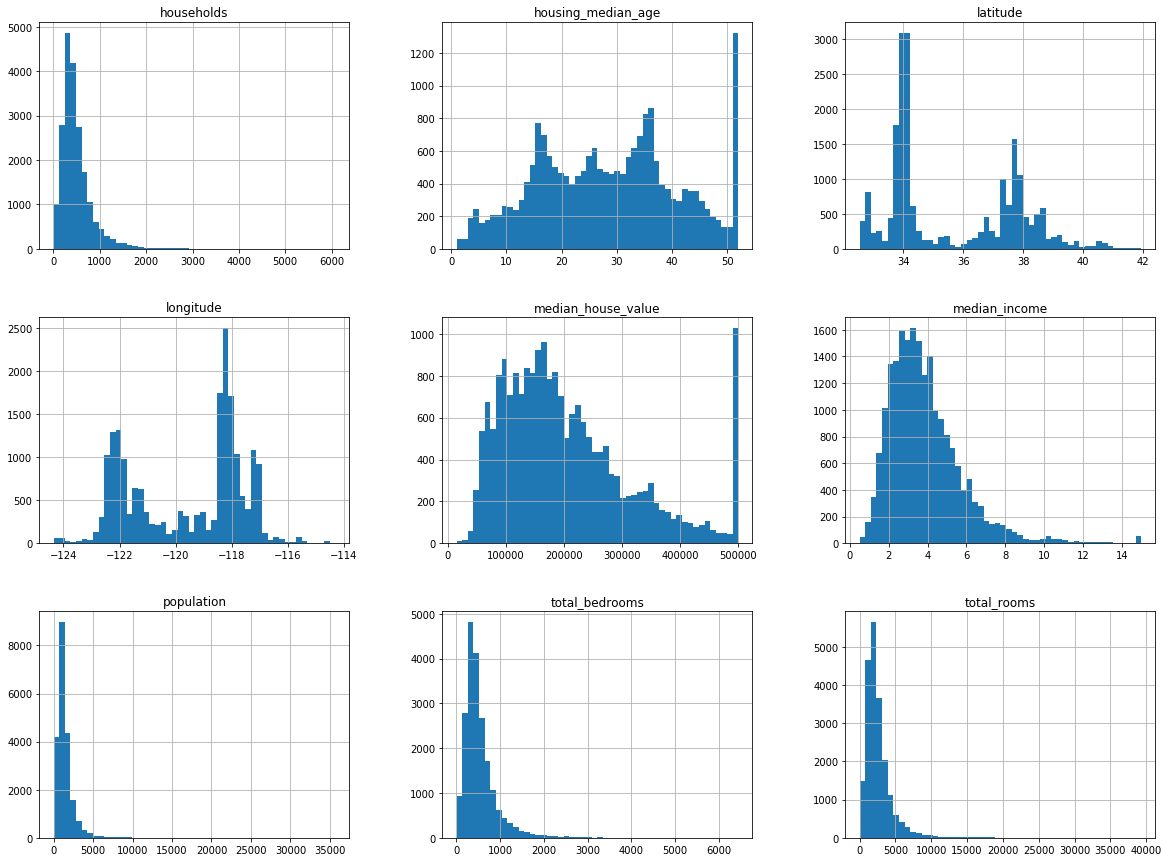

In [12]:
#  Histogram plotting to have information of data distribution


# This tells python to plot the data inside the jupyter only
%matplotlib inline

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))



# this below command is required when you are running code in spyder to display the plots

# plt.show()

---
# Creating a Test Data


In [13]:
# Creating a function to divide the data into train and test data

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
# splitting the data into train and test

train_set, test_set = split_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_set)

4128

In [17]:
train_set.shape

(16512, 10)

In [18]:
test_set.shape

(4128, 10)

# Testing new instance

In [19]:
# testing new instances

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))

    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
# the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

housing_with_id = housing.reset_index() # adds an `index` column

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
train_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   
6      6    -122.25     37.84                52.0       2535.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   
6           489.0      1094.0       514.0         3.6591            299200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY  
6        NEAR BAY

In [22]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
2       2    -122.24     37.85                52.0       1467.0   
5       5    -122.25     37.85                52.0        919.0   
12     12    -122.26     37.85                52.0       2491.0   
16     16    -122.27     37.85                52.0       1966.0   
23     23    -122.27     37.84                52.0       1688.0   

    total_bedrooms  population  households  median_income  median_house_value  \
2            190.0       496.0       177.0         7.2574            352100.0   
5            213.0       413.0       193.0         4.0368            269700.0   
12           474.0      1098.0       468.0         3.0750            213500.0   
16           347.0       793.0       331.0         2.7750            152500.0   
23           337.0       853.0       325.0         2.1806             99700.0   

   ocean_proximity  
2         NEAR BAY  
5         NEAR BAY  
12        NEAR BAY  
16        NEAR BAY  
23        NEAR BAY

In [23]:
# # If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the 
 ## dataset, and no row ever gets deleted. If this is not possible, then you can try to use the most stable features to 
    ## build a unique identifier.t
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")  

In [24]:
train_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity         id  
0        NEAR BAY -122192.12  
1        NEAR BAY -122182.14  
2        NEAR BAY -122202.15  
3        NEAR BAY -122212.15  
4        NEAR BAY -122212.15

In [25]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
59     59    -122.29     37.82                 2.0        158.0   
60     60    -122.29     37.83                52.0       1121.0   
61     61    -122.29     37.82                49.0        135.0   
62     62    -122.29     37.81                50.0        760.0   
67     67    -122.29     37.80                52.0       1027.0   

    total_bedrooms  population  households  median_income  median_house_value  \
59            43.0        94.0        57.0         2.5625             60000.0   
60           211.0       554.0       187.0         3.3929             75700.0   
61            29.0        86.0        23.0         6.1183             75000.0   
62           190.0       377.0       122.0         0.9011             86100.0   
67           244.0       492.0       147.0         2.6094             81300.0   

   ocean_proximity         id  
59        NEAR BAY -122252.18  
60        NEAR BAY -122252.17  
61        NEAR BAY -122252.18  
62        NEAR BAY -122252.19  
67        NEAR BAY -122252.20

In [26]:
# sklearn comes with it's own function of dividing the data into train and test 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [27]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND

In [28]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

---
# Stratified sampling

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
# Creating the income categories i.e. from 0 to 1.5, then 1.5 to 3 and so on....

housing["income_cat"] = pd.cut(housing["median_income"],
            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
            labels=[1, 2, 3, 4, 5]) 

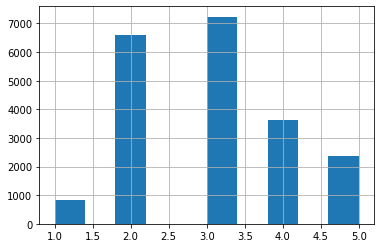

In [31]:
# Generating the histogram for those

housing["income_cat"].hist()

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [33]:
# getting the stratified train and test data

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [34]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
10970       <1H OCEAN          4  
20351       <1H OCEAN          3  
6568           INLAND          3  
13285          INLAND          3

In [35]:
# Income Categories mean on the basis of categories

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [36]:
# Now removing the income_cat attribute so the data is back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity  
5241        <1H OCEAN  
10970       <1H OCEAN  
20351       <1H OCEAN  
6568           INLAND  
13285          INLAND

---
# Discover and Visualize the data to gain insight

In [38]:
housing = strat_train_set.copy()

In [39]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

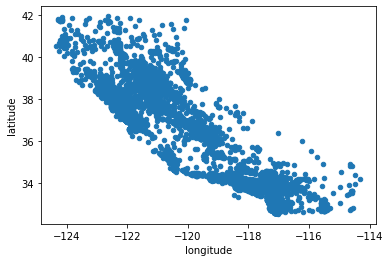

In [40]:
# creating the scatter plot

housing.plot(kind="scatter", x="longitude", y="latitude")

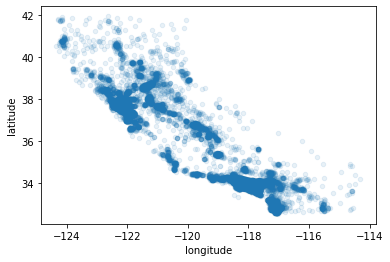

In [41]:
# To know more about the density of the data, using the paramter "alpha"

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

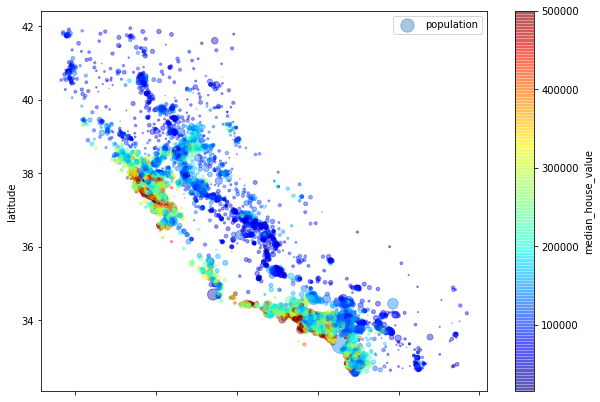

In [42]:
# scatter plot with radius of each data point is represented by district's population

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)


plt.legend()

In [43]:
# Getting the correlation of housing data

corr_matrix = housing.corr()

In [44]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [46]:
# Correlation with the help of pandas

from pandas.plotting import scatter_matrix


In [47]:
attributes = ["median_house_value", "median_income", "total_rooms",
                    "housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DDE234CF8>,
      dtype=object)

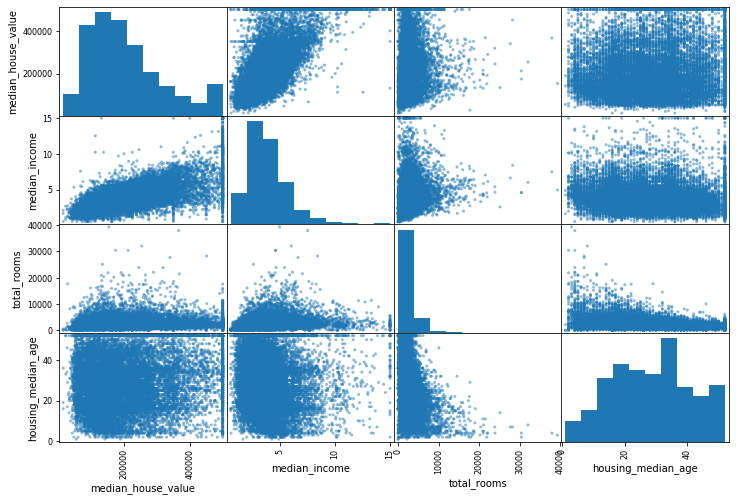

In [48]:
scatter_matrix(housing[attributes], figsize=(12, 8))

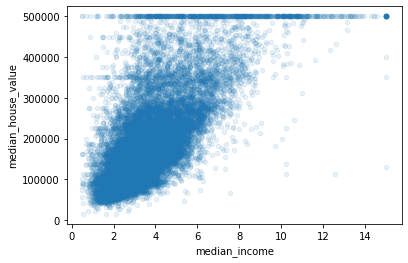

In [49]:
# median_house_value vs median income

housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [50]:
# We are interested more in these below values

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [51]:
# Now doing the correlation

corr_matrix = housing.corr()

In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### The new bedrooms_per_room attribute is much more correlated with
### the median house value than the total number of rooms or bedrooms.

*--------------------------------------------------------------------------------------------------*

# Preparing the Data for Machine Learning

In [53]:
# Separating the predictors and labels, because we may not want to apply same transformation to the predictors and labels

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [54]:
# You have got three options for handling the missing values

# removing na rows
housing.dropna(subset=["total_bedrooms"]) # option 1


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   
16365    -121.31     38.02                24.0       4157.0           951.0   
19684    -121.62     39.14                41.0       2183.0           559.0   
19234    -122.69     38.51                18.0       3364.0           501.0   
13956    -117.06     34.17                21.0       2520.0           582.0   
2390     -119.46     36.91                12.0       2980.0           495.0   
11176    -117.96     33.83                30.0       2838.0           649.0   
15614    -122.41     37.81                25.0       1178.0           545.0   
2953     -119.02     35.35                42.0       1239.0           251.0   
13209    -117.72     34.05                 8.0       1841.0           409.0   
6569     -118.15     34.20                46.0       1505.0           261.0   
5825     -118.30     34.19                14.0       3615.0           913.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   
13989    -117.19     34.94                31.0       2034.0           444.0   
15168    -117.06     33.02                24.0        830.0           190.0   
6747     -118.07     34.11                41.0       2869.0           563.0   
7398     -118.24     33.96                44.0       1338.0           366.0   
5562     -118.28     33.91                41.0        620.0           133.0   
16121    -122.46     37.79                52.0       2059.0           416.0   
...          ...       ...                 ...          ...             ...   
12380    -116.47     33.77                26.0       4300.0           767.0   
5618     -118.23     33.78                20.0         59.0            24.0   
10060    -121.06     39.25                17.0       3127.0           539.0   
18067    -122.03     37.29                22.0       3118.0           438.0   
4471     -118.17     34.09                33.0       2907.0           797.0   
19786    -122.86     40.56                12.0       1350.0           300.0   
9969     -122.48     38.51                49.0       1977.0           393.0   
14621    -117.17     32.78                17.0       3845.0          1051.0   
579      -122.07     37.71                40.0       1808.0           302.0   
11682    -118.01     33.87                25.0       6348.0          1615.0   
245      -122.21     37.78                43.0       1702.0           460.0   
12130    -117.23     33.94                 8.0       2405.0           537.0   
16441    -121.29     38.14                34.0       2770.0           544.0   
11016    -117.82     33.76                33.0       2774.0           428.0   
19934    -119.34     36.31                14.0       1635.0           422.0   
1364     -122.14     38.03                42.0        118.0            34.0   
1236     -120.37     38.23                13.0       4401.0           829.0   
5364     -118.42     34.04                52.0       1358.0           272.0   
11703    -117.97     33.88                16.0       2003

In [55]:
# removing 'total_bedrooms' attribute

housing.drop("total_bedrooms", axis=1) # option 2


longitude  latitude  housing_median_age  total_rooms  population  \
17606    -121.89     37.29                38.0       1568.0       710.0   
18632    -121.93     37.05                14.0        679.0       306.0   
14650    -117.20     32.77                31.0       1952.0       936.0   
3230     -119.61     36.31                25.0       1847.0      1460.0   
3555     -118.59     34.23                17.0       6592.0      4459.0   
19480    -120.97     37.66                24.0       2930.0      1448.0   
8879     -118.50     34.04                52.0       2233.0       769.0   
13685    -117.24     34.15                26.0       2041.0       936.0   
4937     -118.26     33.99                47.0       1865.0      1916.0   
4861     -118.28     34.02                29.0        515.0      2690.0   
16365    -121.31     38.02                24.0       4157.0      2734.0   
19684    -121.62     39.14                41.0       2183.0      1202.0   
19234    -122.69     38.51                18.0       3364.0      1442.0   
13956    -117.06     34.17                21.0       2520.0       416.0   
2390     -119.46     36.91                12.0       2980.0      1184.0   
11176    -117.96     33.83                30.0       2838.0      1758.0   
15614    -122.41     37.81                25.0       1178.0       592.0   
2953     -119.02     35.35                42.0       1239.0       776.0   
13209    -117.72     34.05                 8.0       1841.0      1243.0   
6569     -118.15     34.20                46.0       1505.0       857.0   
5825     -118.30     34.19                14.0       3615.0      1924.0   
18086    -122.05     37.31                25.0       4111.0      1585.0   
16718    -120.66     35.49                17.0       4422.0      2307.0   
13600    -117.25     34.16                37.0       1709.0       744.0   
13989    -117.19     34.94                31.0       2034.0      1097.0   
15168    -117.06     33.02                24.0        830.0       279.0   
6747     -118.07     34.11                41.0       2869.0      1627.0   
7398     -118.24     33.96                44.0       1338.0      1765.0   
5562     -118.28     33.91                41.0        620.0       642.0   
16121    -122.46     37.79                52.0       2059.0       999.0   
...          ...       ...                 ...          ...         ...   
12380    -116.47     33.77                26.0       4300.0      1557.0   
5618     -118.23     33.78                20.0         59.0        69.0   
10060    -121.06     39.25                17.0       3127.0      1390.0   
18067    -122.03     37.29                22.0       3118.0      1147.0   
4471     -118.17     34.09                33.0       2907.0      3212.0   
19786    -122.86     40.56                12.0       1350.0       423.0   
9969     -122.48     38.51                49.0       1977.0       741.0   
14621    -117.17     32.78                17.0       3845.0      3102.0   
579      -122.07     37.71                40.0       1808.0       746.0   
11682    -118.01     33.87                25.0       6348.0      4188.0   
245      -122.21     37.78                43.0       1702.0      1227.0   
12130    -117.23     33.94                 8.0       2405.0      1594.0   
16441    -121.29     38.14                34.0       2770.0      1409.0   
11016    -117.82     33.76                33.0       2774.0      1229.0   
19934    -119.34     36.31                14.0       1635.0       870.0   
1364     -122.14     38.03                42.0        118.0        54.0   
1236     -120.37     38.23                13.0       4401.0       924.0   
5364     -118.42     34.04                52.0       1358.0       574.0   
11703    -117.97     33.88                16.0       2003.0      1172.0   
10356    -117.67     33.60                25.0       3164.0      1517.0   
15270    -117.29     33.08                18.0       3225.0      1463.0   
3754     -118.37     34.18      

In [56]:
# replacing the missing data with median and storing the data into other variable

median = housing["total_bedrooms"].median() # option 3


In [57]:
# making changes in the data itself

housing["total_bedrooms"].fillna(median, inplace=True)

---
# Using SimpleImputer

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
# telling that imputer will work with median values

imputer = SimpleImputer(strategy="median")

In [60]:
# copying the data into another variable but removing the non numeric values

housing_num = housing.drop("ocean_proximity", axis=1)

In [61]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

In [62]:
# Fitting the Imputer instance

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [63]:
# Getting the imputer statistics

# These are the median values of all the columns
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
# Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

X = imputer.transform(housing_num)

In [66]:
# The result is a plain NumPy array containing the transformed features. If you want t0 put it back into a Pandas DataFrame

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [67]:
type(housing_tr)

pandas.core.frame.DataFrame

In [68]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621  
3      1460.0       353.0         1.8839  
4      4459.0      1463.0         3.0347

---
# Handling Text Data

In [69]:
# getting housing category of the data

housing_cat = housing[["ocean_proximity"]]

In [70]:
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [71]:
# Most Machine Learning algorithms prefer to work with numbers anyway, so let’s converr these categories from text to numbers.

from sklearn.preprocessing import OrdinalEncoder

In [72]:
ordinal_encoder = OrdinalEncoder()

In [73]:
# fit_transform for converting the categories into the numbers

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [74]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [75]:
# To know the categories 

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---
# One Hot Encoding for text to numerical data


In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
cat_encoder = OneHotEncoder()

In [78]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [79]:
# This is a sparse matrix which have lots of 0 and only contains single 1 per rows 

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

 Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix 
 only stores the location of the non‐zero elements.
 

In [80]:
# But if you really want to convert it to a (dense) NumPy array, just call the toarray() method.

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [81]:
# Once again, you can get the list of categories using the encoder’s categories_ instance variable

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---
# Transformation Pipelines

In [82]:
# Just add the code as it is, no need to understand
# Code is actually for Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [86]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [87]:
# Housing number data frame have been transformed with pipelining

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [88]:
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   
16365    -121.31     38.02                24.0       4157.0           951.0   
19684    -121.62     39.14                41.0       2183.0           559.0   
19234    -122.69     38.51                18.0       3364.0           501.0   
13956    -117.06     34.17                21.0       2520.0           582.0   
2390     -119.46     36.91                12.0       2980.0           495.0   
11176    -117.96     33.83                30.0       2838.0           649.0   
15614    -122.41     37.81                25.0       1178.0           545.0   
2953     -119.02     35.35                42.0       1239.0           251.0   
13209    -117.72     34.05                 8.0       1841.0           409.0   
6569     -118.15     34.20                46.0       1505.0           261.0   
5825     -118.30     34.19                14.0       3615.0           913.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   
13989    -117.19     34.94                31.0       2034.0           444.0   
15168    -117.06     33.02                24.0        830.0           190.0   
6747     -118.07     34.11                41.0       2869.0           563.0   
7398     -118.24     33.96                44.0       1338.0           366.0   
5562     -118.28     33.91                41.0        620.0           133.0   
16121    -122.46     37.79                52.0       2059.0           416.0   
...          ...       ...                 ...          ...             ...   
12380    -116.47     33.77                26.0       4300.0           767.0   
5618     -118.23     33.78                20.0         59.0            24.0   
10060    -121.06     39.25                17.0       3127.0           539.0   
18067    -122.03     37.29                22.0       3118.0           438.0   
4471     -118.17     34.09                33.0       2907.0           797.0   
19786    -122.86     40.56                12.0       1350.0           300.0   
9969     -122.48     38.51                49.0       1977.0           393.0   
14621    -117.17     32.78                17.0       3845.0          1051.0   
579      -122.07     37.71                40.0       1808.0           302.0   
11682    -118.01     33.87                25.0       6348.0          1615.0   
245      -122.21     37.78                43.0       1702.0           460.0   
12130    -117.23     33.94                 8.0       2405.0           537.0   
16441    -121.29     38.14                34.0       2770.0           544.0   
11016    -117.82     33.76                33.0       2774.0           428.0   
19934    -119.34     36.31                14.0       1635.0           422.0   
1364     -122.14     38.03                42.0        118.0            34.0   
1236     -120.37     38.23                13.0       4401.0           829.0   
5364     -118.42     34.04                52.0       1358.0           272.0   
11703    -117.97     33.88                16.0       2003

---
# ColumnTransformer to transform all the column at once instead of handling them separately

In [89]:
from sklearn.compose import ColumnTransformer

In [90]:
num_attribs = list(housing_num)

In [91]:
cat_attribs = ["ocean_proximity"]

In [92]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [93]:
housing_prepared = full_pipeline.fit_transform(housing)

In [94]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

--- 
# Training and Evaluating on the Training Set

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lin_reg = LinearRegression()

In [97]:
# Passing the X and y that is predictors and Target data

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# Trying our model onto some instances

some_data = housing.iloc[:5]

In [99]:
some_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

In [100]:
some_labels = housing_labels.iloc[:5]

In [101]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [102]:
# Transforming the data

some_data_prepared = full_pipeline.transform(some_data)

In [103]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [104]:
# Doing the Predictions

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [105]:
# Checking the Labels

print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [106]:
# It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!).

# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error

In [107]:
housing_predictions = lin_reg.predict(housing_prepared)

In [108]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [109]:
lin_rmse = np.sqrt(lin_mse)

In [110]:
lin_rmse

68628.19819848922

# So much RMSE is an example of model underfitting. 
# Features did not provide enough information to make the good predictions.
---
---

In [111]:
# Lets Try different approach of Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [112]:
tree_reg = DecisionTreeRegressor()

In [113]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [114]:
# Now, Predicting on the training data

housing_predictions = tree_reg.predict(housing_prepared)

In [115]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [116]:
tree_rmse = np.sqrt(tree_mse)

In [117]:
# Checking the value of RMSE

tree_rmse

0.0

# RMSE 0 is the direct example of model overfitting
---
---

---
# K fold Cross Validation Implementation

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                                                            scoring="neg_mean_squared_error", cv=10)

---
Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative
value), which is why the preceding code computes -scores
before calculating the square root.

In [120]:
tree_rmse_scores = np.sqrt(-scores)

In [121]:
tree_rmse_scores

array([70248.74961387, 66837.30985961, 70304.40158545, 70420.29476564,
       71181.18359287, 75083.71135692, 69678.74987256, 71794.5612275 ,
       77376.96831567, 69206.07952196])

In [122]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [123]:
display_scores(tree_rmse_scores)

Scores: [70248.74961387 66837.30985961 70304.40158545 70420.29476564
 71181.18359287 75083.71135692 69678.74987256 71794.5612275
 77376.96831567 69206.07952196]
Mean: 71213.20097120461
Standard deviation: 2850.0555447992397


### This above Cross validation have performed badly, even worse than Linear Regression. Cross validation comes at the cost 
 ### training the model several times.
---    

In [124]:
# Now, compute the same numbers with the Linear Regression as well

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                                        scoring="neg_mean_squared_error", cv=10)

In [125]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [126]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983434


In [127]:
### Now, check with Random Forest as well

from sklearn.ensemble import RandomForestRegressor

In [128]:
forest_reg = RandomForestRegressor()

In [129]:
forest_reg.fit(housing_prepared, housing_labels)

D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [130]:
# Repeat same as we did with Linear Regresssion
# Random Forest will come out to be better than Decision Tree and Linear Regression

---
# Fine Tuning the Model

## Grid Search

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [133]:
forest_reg = RandomForestRegressor()

In [134]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
             scoring='neg_mean_squared_error',
                            return_train_score=True)   

In [135]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [136]:
# Best mombinations of parameters

grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [137]:
# Best estimators

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [138]:
# Evaluation Scores

cvres = grid_search.cv_results_

In [139]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64234.83014362456 {'max_features': 2, 'n_estimators': 3}
55839.27447772112 {'max_features': 2, 'n_estimators': 10}
52894.80816609894 {'max_features': 2, 'n_estimators': 30}
60475.4913486061 {'max_features': 4, 'n_estimators': 3}
52630.45652954842 {'max_features': 4, 'n_estimators': 10}
50299.76897777492 {'max_features': 4, 'n_estimators': 30}
59553.497169881695 {'max_features': 6, 'n_estimators': 3}
51859.94357515332 {'max_features': 6, 'n_estimators': 10}
49796.808387231635 {'max_features': 6, 'n_estimators': 30}
58500.39068100559 {'max_features': 8, 'n_estimators': 3}
52293.76642804686 {'max_features': 8, 'n_estimators': 10}
50178.92903822828 {'max_features': 8, 'n_estimators': 30}
62408.4986987073 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53802.890197385444 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60905.00243494984 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51959.5026388362 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In this example, we obtain the best solution by setting the max_features hyperparameter
to 8, and the n_estimators hyperparameter to 30. The RMSE score for this
combination is 49,682, which is slightly better than the score you got earlier using the
default hyperparameter values (which was 50,182).

---
# Analyze the Best Models and Their Errors

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [141]:
feature_importances

array([8.44524102e-02, 6.96888320e-02, 4.18472576e-02, 1.75696023e-02,
       1.67061372e-02, 1.74328641e-02, 1.53670720e-02, 2.80224281e-01,
       5.51630362e-02, 1.03914504e-01, 1.13162860e-01, 5.08152456e-03,
       1.73727781e-01, 4.72361363e-05, 2.47949039e-03, 3.13511066e-03])

In [142]:
# Let’s display these importance scores next to their corresponding attribute names:

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [143]:
cat_encoder = full_pipeline.named_transformers_["cat"]

In [144]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [145]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [146]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2802242810784691, 'median_income'),
 (0.17372778149780363, 'INLAND'),
 (0.11316285979192123, 'bedrooms_per_room'),
 (0.10391450432859134, 'pop_per_hhold'),
 (0.08445241015305728, 'longitude'),
 (0.06968883203879732, 'latitude'),
 (0.05516303622208489, 'rooms_per_hhold'),
 (0.04184725757540762, 'housing_median_age'),
 (0.017569602257575936, 'total_rooms'),
 (0.017432864133160583, 'population'),
 (0.01670613715624625, 'total_bedrooms'),
 (0.015367072022159619, 'households'),
 (0.0050815245554917225, '<1H OCEAN'),
 (0.003135110661234046, 'NEAR OCEAN'),
 (0.0024794903916620014, 'NEAR BAY'),
 (4.723613633745744e-05, 'ISLAND')]